In [1]:
!pip install transformers
!pip install torch
!pip install matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Model ve tokenizer'ı indirin
tokenizer = AutoTokenizer.from_pretrained("WhiteAngelss/bert-base-turkish-cased")
model = AutoModelForSequenceClassification.from_pretrained("WhiteAngelss/bert-base-turkish-cased")

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/936 [00:00<?, ?B/s]

In [6]:
# Sınıflara uygun test cümleleri
sentences = [
    "Sen gerçekten aptalsın ve her şeyin en kötüsünü hak ediyorsun.",  # INSULT
    "Bugün hava çok güzel.",                                         # OTHER
    "Bu dilimizdeki küfürlerden biri olabilir.",                      # PROFANITY
    "Tüm kadınlar sadece mutfak işlerini yapar, bu doğaldır.",        # SEXIST
    "Siyahlar toplumda geri kalmış, bu kabul edilemez.",               # RACIST
]

# Cümleleri tokenize etme ve model ile tahmin etme
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
outputs = model(**inputs)

# Model çıktısını yumuşak maksimum (softmax) ile olasılıklara çevirme
probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

# Etiketlerin tanımlanması
id2label = {
    "0": "INSULT",
    "1": "OTHER",
    "2": "PROFANITY",
    "3": "RACIST",
    "4": "SEXIST"
}

# Sonuçları yazdırma
for i, sentence in enumerate(sentences):
    print(f"Cümle: {sentence}")
    label = torch.argmax(probs[i]).item()
    print(f"Tahmin Edilen Etiket: {id2label[str(label)]}")
    print(f"Olasılıklar: {probs[i].detach().numpy()}\n")


Cümle: Sen gerçekten aptalsın ve her şeyin en kötüsünü hak ediyorsun.
Tahmin Edilen Etiket: INSULT
Olasılıklar: [9.9913067e-01 6.6088996e-04 1.0379490e-04 5.5513232e-05 4.9237940e-05]

Cümle: Bugün hava çok güzel.
Tahmin Edilen Etiket: OTHER
Olasılıklar: [1.5199944e-05 9.9989355e-01 3.8171096e-05 3.0925486e-05 2.2164393e-05]

Cümle: Bu dilimizdeki küfürlerden biri olabilir.
Tahmin Edilen Etiket: OTHER
Olasılıklar: [4.5857258e-05 9.9982053e-01 4.0647661e-05 7.6603275e-05 1.6308426e-05]

Cümle: Tüm kadınlar sadece mutfak işlerini yapar, bu doğaldır.
Tahmin Edilen Etiket: SEXIST
Olasılıklar: [4.8171540e-05 1.6441996e-03 1.6462518e-04 9.2892849e-05 9.9805009e-01]

Cümle: Siyahlar toplumda geri kalmış, bu kabul edilemez.
Tahmin Edilen Etiket: RACIST
Olasılıklar: [3.6744877e-05 6.9670299e-05 2.2363009e-05 9.9980730e-01 6.4041873e-05]



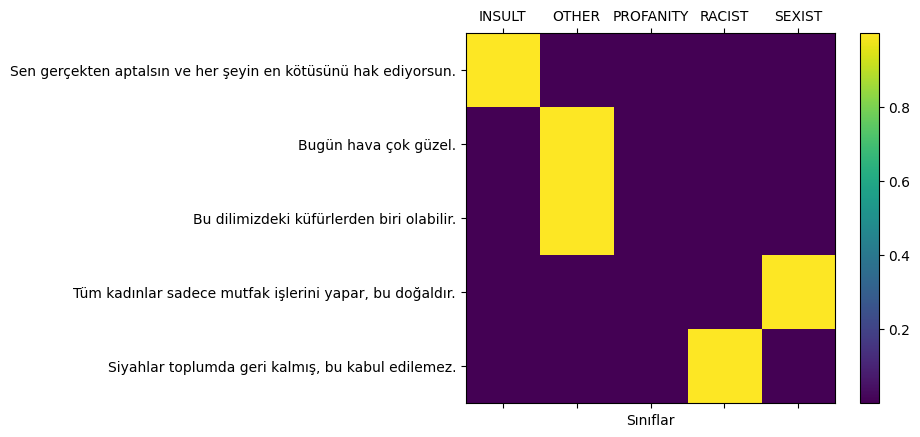

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Olasılıkları numpy dizisine çevirme
probs_np = probs.detach().numpy()

# Çıktıları görselleştirme
fig, ax = plt.subplots()
cax = ax.matshow(probs_np, cmap='viridis')

# Eksen etiketlerini ayarlama
ax.set_xticks(range(len(id2label)))
ax.set_yticks(range(len(sentences)))
ax.set_xticklabels(id2label.values())
ax.set_yticklabels(sentences)
ax.set_xlabel('Sınıflar')

# Renkli bar ekleme
fig.colorbar(cax)

# Gösterme
plt.show()


Kullanıcı Cümlesi: Bu ürün çok kalitesiz ve berbat.
Tahmin Edilen Etiketler ve Olasılıklar:
INSULT    : 2.42%
OTHER     : 97.42%
PROFANITY : 0.06%
RACIST    : 0.09%
SEXIST    : 0.02%


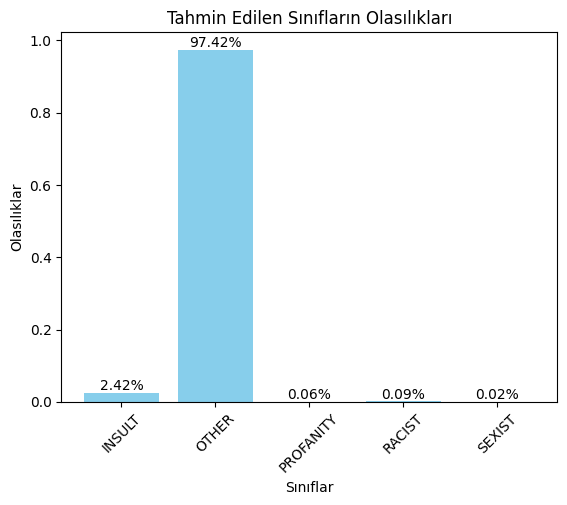

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt

# Model ve tokenizer'ı indirin
tokenizer = AutoTokenizer.from_pretrained("WhiteAngelss/bert-base-turkish-cased")
model = AutoModelForSequenceClassification.from_pretrained("WhiteAngelss/bert-base-turkish-cased")

# Kullanıcı girdisi
user_sentence = "Bu ürün çok kalitesiz ve berbat."

# Cümleyi tokenize etme ve model ile tahmin etme
user_input = tokenizer(user_sentence, return_tensors="pt", padding=True, truncation=True)
user_output = model(**user_input)

# Model çıktısını yumuşak maksimum (softmax) ile olasılıklara çevirme
user_probs = torch.nn.functional.softmax(user_output.logits, dim=-1)

# Etiketlerin tanımlanması
id2label = {
    "0": "INSULT",
    "1": "OTHER",
    "2": "PROFANITY",
    "3": "RACIST",
    "4": "SEXIST"
}

# Olasılıkları numpy dizisine çevirme
user_probs_np = user_probs.detach().numpy().flatten()

# Sonuçları biçimlendirilmiş olarak yazdırma
print(f"Kullanıcı Cümlesi: {user_sentence}")
print("Tahmin Edilen Etiketler ve Olasılıklar:")
for idx, prob in enumerate(user_probs_np):
    label = id2label[str(idx)]
    print(f"{label:10}: {prob * 100:.2f}%")

# Sonuçları çubuk grafik olarak görselleştirme
fig, ax = plt.subplots()
bars = ax.bar(id2label.values(), user_probs_np, color='skyblue')
ax.set_xlabel('Sınıflar')
ax.set_ylabel('Olasılıklar')
ax.set_title('Tahmin Edilen Sınıfların Olasılıkları')

# Her çubuğun üzerine olasılığı yazdırma
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height * 100:.2f}%', ha='center', va='bottom')

# Gösterme
plt.xticks(rotation=45)
plt.show()